# Analyze the usage.csv in this folder

In [1]:
import csv
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

## data description

df2 usage_cpu_e3_t25_main.csv: CPU only transforms

df3 usage_e3_t25_gpu_transforms.csv: GPU transforms but with transfer to the CPU

df4 data/usage_cpu_torch_empty_cuda_e3_t25.csv: Experiment with CPU only transform but resetting the CUDA cache on every iteration -> Learn how deep the memory sinks in between iterations

df5 data/usage_GPU_transforms_e5_little_cpu_transfer.csv

df6 All transforms are done on the GPU and no transfer on the CPU is done..

Further descriptions are on notion!

Missing:
3) Debug batch data and see where else data might be on the GPU..


What did not work:

- deletion of all non relevant entries in the batch data - apparently they are not the problem..
- 

In [2]:
# location = 'data/2_usage.csv' #df1
# location = 'data/usage_cpu_e3_t25_main.csv' #df2
# location = 'data/usage_e3_t25_gpu_transforms.csv' #df3
# location = 'data/usage_cpu_torch_empty_cuda_e3_t25.csv' #df4
# location = 'data/usage_GPU_transforms_e5_little_cpu_transfer.csv' #df5
# location = 'data/usage_all_on_gpu_e_3.csv' #df6
location = 'data/25_usage.csv'
# location2 = 'data/16_usage.csv'
# location = 'data/17_usage.csv'
df = pd.read_csv(location) 

In [3]:
print(df.describe())

        device  context  utilization  total memory (MB)  free memory (MB)  \
count  67268.0      0.0      67268.0            67268.0      67268.000000   
mean       1.0      NaN          0.0            81920.0      50565.899298   
std        0.0      NaN          0.0                0.0      13289.004847   
min        1.0      NaN          0.0            81920.0       6181.000000   
25%        1.0      NaN          0.0            81920.0      40953.000000   
50%        1.0      NaN          0.0            81920.0      49946.000000   
75%        1.0      NaN          0.0            81920.0      61304.000000   
max        1.0      NaN          0.0            81920.0      80403.000000   

       used memory (MB)  memory not used by torch (MB)  cupy memory (MB)  
count      67268.000000                    67268.00000      67268.000000  
mean       31354.100702                      774.24609          1.955982  
std        13289.004847                      107.87983         24.906206  
min   

In [4]:
df["time"] = pd.to_datetime(df["time"])

In [5]:
gpu_util = df.loc[:,"gpu util (%)"].rolling(10).sum()  / 10
gpu_util.plot(subplots=True, figsize=(15,2),ylim=(0,1))

KeyError: 'gpu util (%)'

In [ ]:
memory_util = df.loc[:,"memory util (%)"].rolling(10).sum()  / 10
memory_util.plot(subplots=True, figsize=(15,2),ylim=(0,1))

In [ ]:
# df.loc[:,"free memory (MB)":'Memory not used by torch (MB)'].plot(
#     subplots=True, 
#     figsize=(15,10), 
#     ylim=(0,df.loc[:,"total memory (MB)"][0]))


In [6]:
# pd.DataFrame.plot(df.loc[:,"free memory (MB)":'Memory not used by torch (MB)'], subplots=True, 
#                 figsize=(15,10), 
#                 ylim=(0,df.loc[:,"total memory (MB)"][0]))
divisor = df.shape[0] / 5
print(divisor)

13453.6


In [7]:
divisor = int(df.shape[0] / 10)
df["used memory moving average"] = df.loc[:,"used memory (MB)"].rolling(divisor).sum()  / divisor

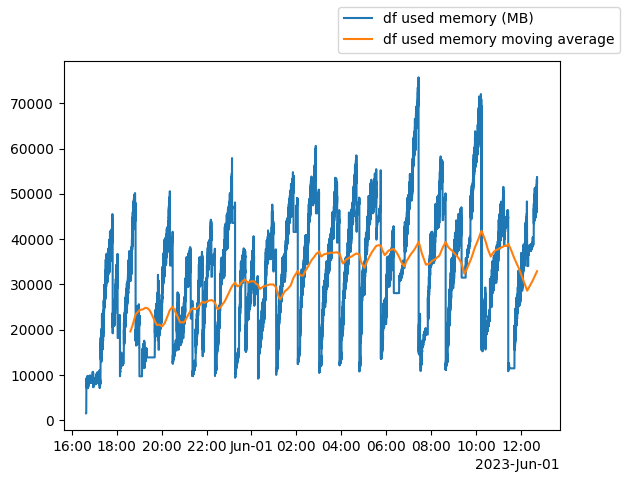

In [8]:
plot, ax = plt.subplots()
from_tick = 0
to_tick = df.shape[0]
for i in ("used memory (MB)","used memory moving average"):
    ax.plot(df.loc[from_tick:to_tick, 'time'], df.loc[from_tick:to_tick, i], label=f"df {i}")
    # ax.plot(df2.loc[from_tick:to_tick, 'time'], df2.loc[from_tick:to_tick, i], label=f"df2 {i}")
    
plot.legend()

cdf = mpl.dates.ConciseDateFormatter(ax.xaxis.get_major_locator())
ax.xaxis.set_major_formatter(cdf)

In [9]:
df.columns
print(df.shape[0])
print(df.loc[df.shape[0]-1:, 'time'])
# df.loc[:," total memory (MB)"][0]
# df.loc[:," Memory not used by torch (MB)"][10]

67268
67267   2023-06-01 12:43:24
Name: time, dtype: datetime64[ns]


In [10]:
with pd.option_context('display.max_rows', None,
                       'display.max_columns', None,
                       'display.precision', 3,
                       ):
    print(df.loc[df.shape[0]-100:, "utilization"])

67168    0
67169    0
67170    0
67171    0
67172    0
67173    0
67174    0
67175    0
67176    0
67177    0
67178    0
67179    0
67180    0
67181    0
67182    0
67183    0
67184    0
67185    0
67186    0
67187    0
67188    0
67189    0
67190    0
67191    0
67192    0
67193    0
67194    0
67195    0
67196    0
67197    0
67198    0
67199    0
67200    0
67201    0
67202    0
67203    0
67204    0
67205    0
67206    0
67207    0
67208    0
67209    0
67210    0
67211    0
67212    0
67213    0
67214    0
67215    0
67216    0
67217    0
67218    0
67219    0
67220    0
67221    0
67222    0
67223    0
67224    0
67225    0
67226    0
67227    0
67228    0
67229    0
67230    0
67231    0
67232    0
67233    0
67234    0
67235    0
67236    0
67237    0
67238    0
67239    0
67240    0
67241    0
67242    0
67243    0
67244    0
67245    0
67246    0
67247    0
67248    0
67249    0
67250    0
67251    0
67252    0
67253    0
67254    0
67255    0
67256    0
67257    0
67258    0